## Importing required packages

In [309]:
import pandas as pd
import sys, os
import math
from IPython.display import Image
from copy import deepcopy

In [310]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [311]:
import sklearn as skl

## Import dataset

#### The dataset being used here is the housing market typology dataset for the period of 2010-11. Here, each row represents a block of balitmore city. A block is a region of the city created for the purposes of the US Census collection. Each block is tagged by a market category indicative of the block's desirability on the real estate market. The dataset contains features which describe each block in terms of it's performance on the real estate market as well as attributes about the residential properties therein.

In [312]:
dataframe = pd.read_csv('Housing_Market_Typology_2011.csv')

In [313]:
dataframe.head(50)

,blockGroup,marketCategory,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
0,101001,Regional Choice,79,0.40,15.25,15225.00,0%,0%,0%,3%,$238000.00,78%
1,101002,Regional Choice,69,0.35,3.59,11975.00,1%,1%,1%,5%,$235000.00,69.4%
2,101003,Regional Choice,47,0.41,5.08,6100.00,0%,3%,0%,3%,$299000.00,78.6%
3,102001,Middle Market Choice,51,0.49,0.00,12300.00,1%,0%,2%,8%,$159900.00,68.8%
4,102002,Regional Choice,32,0.46,0.00,14100.00,0%,0%,2%,5%,$199694.00,77.2%
5,102003,Regional Choice,67,0.32,24577.62,16400.00,0%,0%,0%,3%,$230000.00,77.4%
6,102004,Middle Market Choice,33,0.48,0.00,5016.67,1%,0%,1%,7%,$143250.00,69.2%
7,103001,Regional Choice,54,0.42,12.93,2204.55,0%,3%,1%,4%,$232500.00,76.6%
8,103002,Regional Choice,87,0.46,22.04,22000.00,1%,0%,2%,6%,$189900.00,41.3%
9,104001,Regional Choice,61,0.38,1.61,8383.33,1%,1%,0%,3%,$200000.00,61.5%


In [314]:
dataframe.tail(50)

,blockGroup,marketCategory,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
660,2720011,Middle Market,20,0.32,13.69,5772.73,0%,2%,0%,4%,$106000.00,30.4%
661,2720012,Middle Market Choice,14,0.42,5.83,5911.11,1%,1%,1%,4%,$154250.00,44.5%
662,2720013,Middle Market Choice,7,0.36,10.34,3978.57,0%,2%,0%,4%,$131000.00,56.2%
663,2720014,Middle Market,8,0.51,3.52,8686.67,10%,5%,0%,4%,$107500.00,25.4%
664,2720021,Regional Choice,7,0.24,30.15,6626.32,0%,2%,0%,1%,$285000.00,40%
665,2720022,Regional Choice,13,0.47,72.29,2654.55,1%,1%,0%,2%,$240000.00,67.3%
666,2720023,Middle Market Choice,12,0.50,10.68,4636.36,1%,3%,0%,2%,$167500.00,61.7%
667,2201003,NR - Non-residential (<50 residential lots),0,0.00,0.00,0.00,0%,0%,0%,0%,$0.00,0%
668,2720024,< 5 Sales; MultiFamily (>65% of Housing Units),2,0.78,629.61,5735.71,0%,1%,0%,1%,$418500.00,30.3%
669,2720025,< 5 Sales; MultiFamily (>65% of Housing Units),2,0.10,0.00,10125.00,0%,0%,0%,0%,$102500.00,9.6%


In [315]:
dataframe.dtypes

blockGroup                          int64
marketCategory                     object
sales20092010                       int64
salesPriceCoefficientVariance     float64
commercialResidentialLandRatio    float64
unitsPerSquareMile                float64
residentialPermits                 object
vacantLots                         object
vacantHouseNotices                 object
foreclosureFilings                 object
medianSalesPrice20092010           object
ownerOccupied                      object
dtype: object

## Dataset Cleansing

##### Are blocks unique?

In [316]:
len(dataframe)==len(dataframe.drop_duplicates('blockGroup'))

True

##### Remove blockGroup column which is a unique row identifier

In [317]:
dataframe.drop('blockGroup', axis=1, inplace=True)

##### Remove the '%' from values in the columns {residentialPermits, vacantLots, vacantHouseNotices, foreclosureFilings, ownerOccupied} and cast to float datatype

In [318]:
dataframe['residentialPermits']=dataframe['residentialPermits'].replace( '[\%]','', regex=True ).astype(float)
dataframe['vacantLots']=dataframe['vacantLots'].replace( '[\%]','', regex=True ).astype(float)
dataframe['vacantHouseNotices']=dataframe['vacantHouseNotices'].replace( '[\%]','', regex=True ).astype(float)
dataframe['foreclosureFilings']=dataframe['foreclosureFilings'].replace( '[\%]','', regex=True ).astype(float)
dataframe['ownerOccupied']=dataframe['ownerOccupied'].replace( '[\%]','', regex=True ).astype(float)

##### Remove the dollar symbol from values in the column medianSalesPrice20092010 and cast to float datatype

In [319]:
dataframe['medianSalesPrice20092010']=dataframe['medianSalesPrice20092010'].replace( '[\$]','', regex=True ).astype(float)

##### Selecting marketCategory as the class label for the dataset. It labels each block and is indicative of it's demand on the real estate market as per the dataset specification.

In [320]:
dataframe['marketCategory']=dataframe['marketCategory'].astype('category')

In [321]:
dataframe.dtypes

marketCategory                    category
sales20092010                        int64
salesPriceCoefficientVariance      float64
commercialResidentialLandRatio     float64
unitsPerSquareMile                 float64
residentialPermits                 float64
vacantLots                         float64
vacantHouseNotices                 float64
foreclosureFilings                 float64
medianSalesPrice20092010           float64
ownerOccupied                      float64
dtype: object

##### We have 10 features and marketCategory as 1 class label

##### Check if any column contains missing values

In [322]:
for column in dataframe.columns:
    print(column + ': ' + str(len(dataframe)<>len(dataframe[column].notnull())))

marketCategory: False
sales20092010: False
salesPriceCoefficientVariance : False
commercialResidentialLandRatio: False
unitsPerSquareMile: False
residentialPermits: False
vacantLots: False
vacantHouseNotices: False
foreclosureFilings: False
medianSalesPrice20092010: False
ownerOccupied: False


##### Check if any numeric columns contain negative values

In [323]:
for column in dataframe.columns[1:]:
    print(column + ': ' + str(len(dataframe.ix[dataframe[column]<0])>0))

sales20092010: False
salesPriceCoefficientVariance : False
commercialResidentialLandRatio: False
unitsPerSquareMile: False
residentialPermits: False
vacantLots: False
vacantHouseNotices: False
foreclosureFilings: False
medianSalesPrice20092010: False
ownerOccupied: False


## Analyze column ranges and other stats

##### Describe the numeric features in terms of mean, range (min and max) etc.

In [324]:
dataframe.describe()

,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,18.847887,0.602648,217.150817,5683.015211,0.616901,9.073239,7.405634,5.867606,96691.235211,48.385493
std,14.839127,0.307203,1668.778867,4703.420167,4.037867,12.361286,10.611167,17.069573,99209.184736,22.763382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.410000,0.327500,2758.455000,0.000000,2.000000,0.000000,3.000000,26062.500000,33.100000
50%,16.000000,0.570000,4.155000,4807.145000,0.000000,5.000000,1.000000,5.000000,62992.500000,48.000000
75%,25.000000,0.807500,15.897500,7510.717500,0.000000,11.000000,12.750000,7.000000,135187.500000,65.400000
max,99.000000,1.760000,30761.430000,71300.000000,100.000000,92.000000,55.000000,450.000000,670000.000000,100.000000


##### Units per square mile shouldn't have zero value. Upon inspection almost all columns have zero values for these blocks. We can eliminate these rows.

In [325]:
dataframe[dataframe.unitsPerSquareMile==0]

,marketCategory,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
143,>50 residential lots; >50 % vacant lots,0,0,1.60,0,0,85,0,0,0,0
145,NR - Non-residential (<50 residential lots),0,0,0.36,0,0,0,0,0,0,0
159,< 5 Sales; MultiFamily (>65% of Housing Units),0,0,0.00,0,0,20,0,0,0,0
329,NR - Non-residential (<50 residential lots),0,0,0.00,0,0,92,0,0,0,0
493,NR - Non-residential (<50 residential lots),0,0,0.00,0,0,0,0,0,0,0
502,NR - Non-residential (<50 residential lots),0,0,0.00,0,0,71,0,0,0,0
667,NR - Non-residential (<50 residential lots),0,0,0.00,0,0,0,0,0,0,0
709,NR - Non-residential (<50 residential lots),0,0,0.00,0,0,0,0,0,0,0


In [326]:
rowIndicesToDelete = dataframe[dataframe.unitsPerSquareMile==0].index.get_values().tolist()
dataframe.drop(rowIndicesToDelete, inplace=True)

#####  Median sales price seems to have some zero values too. Upon inspection turns out that's because those blocks haven't had any property sales in 2009-10..so these rows are valid.

In [327]:
dataframe[dataframe.medianSalesPrice20092010==0]

,marketCategory,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
25,< 5 Sales; MultiFamily (>65% of Housing Units),0,0,0.89,3350.00,0,6,0,5,0,15.7
26,< 5 Sales; MultiFamily (>65% of Housing Units),0,0,0.24,9553.33,0,12,1,21,0,0.1
27,< 5 Sales; MultiFamily (>65% of Housing Units),0,0,0.09,483.33,0,14,1,0,0,4.4
28,< 5 Sales; MultiFamily (>65% of Housing Units),0,0,1.73,2390.91,2,15,0,0,0,0.0
29,< 5 Residential Sales (2009-2010),0,0,0.24,6.25,0,7,0,0,0,0.0
31,NR - Non-residential (<50 residential lots),0,0,0.00,4566.67,0,3,3,4,0,9.4
46,< 5 Sales; MultiFamily (>65% of Housing Units),0,0,0.78,7263.64,3,17,0,0,0,0.0
58,>50 residential lots; >50 % vacant lots,0,0,0.00,3075.00,0,90,0,0,0,0.0
99,>50 residential lots; >50 % vacant lots,0,0,0.00,2450.00,22,72,1,2,0,24.9
144,< 5 Sales; MultiFamily (>65% of Housing Units),0,0,208.94,71300.00,100,0,0,0,0,0.0


##### Histogram for class labels to understand distibution of instances

In [328]:
dataframe.marketCategory.value_counts()

Distressed                                        209
Middle Market Choice                              117
Middle Market Stressed                            114
Regional Choice                                    94
Middle Market                                      92
< 5 Residential Sales (2009-2010)                  30
< 5 Sales; MultiFamily (>65% of Housing Units)     27
>50 residential lots; >40 % vacant lots             8
NR - Non-residential (<50 residential lots)         7
>50 residential lots; >50 % vacant lots             4
dtype: int64

### <span style="color: green;"> The dataset documentation states that the market category for each block is assigned based on a function of residential neighborhood features, most important parameters being median sales price of residential properties and number of properties sold in the block. Other features in the dataset may play a minor role by way of correlation with the major features. Through decision tree modeling we should be able to build a classifier which leverages these dependencies and converts them into predictive power of the corresponding feature set. We expect to see most of the decisions being based on sales price and number of sales per block in the resulting classifier. </span>

## Training the decision tree classifier

In [329]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz

##### Randomize the dataset

In [330]:
import numpy as np
dataframe = dataframe.reindex(np.random.permutation(dataframe.index))

##### Prepare predictor variables dataframe and class labels dataframe to train the decision tree classifier. The class labels are converted to numeric labels since scikit learn requires this.

In [331]:
X=dataframe.copy()
X.drop(['marketCategory'], axis=1, inplace=True)

In [332]:
le = preprocessing.LabelEncoder()
Y = le.fit_transform(dataframe['marketCategory'])
encodeValues = sorted(pd.unique(Y).tolist())
print(encodeValues)
le.inverse_transform(encodeValues)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


array(['< 5 Residential Sales (2009-2010)',
       '< 5 Sales; MultiFamily (>65% of Housing Units)',
       '>50 residential lots; >40 % vacant lots',
       '>50 residential lots; >50 % vacant lots', 'Distressed',
       'Middle Market', 'Middle Market Choice', 'Middle Market Stressed',
       'NR - Non-residential (<50 residential lots)', 'Regional Choice'], dtype=object)

##### Train a decision tree classifier on the dataset.

In [333]:
dt = DecisionTreeClassifier()
dt.fit(X.values, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

##### Measuring accuracy using cross-validation. <span style="color:red">Need to limit number of folds to 4 here since the number of observations for the smallest 'marktetCategory' label are 4. </span>

In [334]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(dt, X, Y, cv = 4)
scores

array([ 0.89385475,  0.89830508,  0.9137931 ,  0.94186047])

##### Cross-validation accuracy is around 90% across CV runs.

In [335]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.04)


##### Computing deafult accuracy. Decision tree accuracy is significantly better than default accuracy.

In [336]:
defaultAccuracy = (max(dataframe.marketCategory.value_counts())/ float(len(dataframe)))*100.0
print('Default Accuracy = '+str(defaultAccuracy.round(2))+' %')

Default Accuracy = 29.77 %


##### Exporting the decision tree to DOT and PNG files and visualizing the tree here

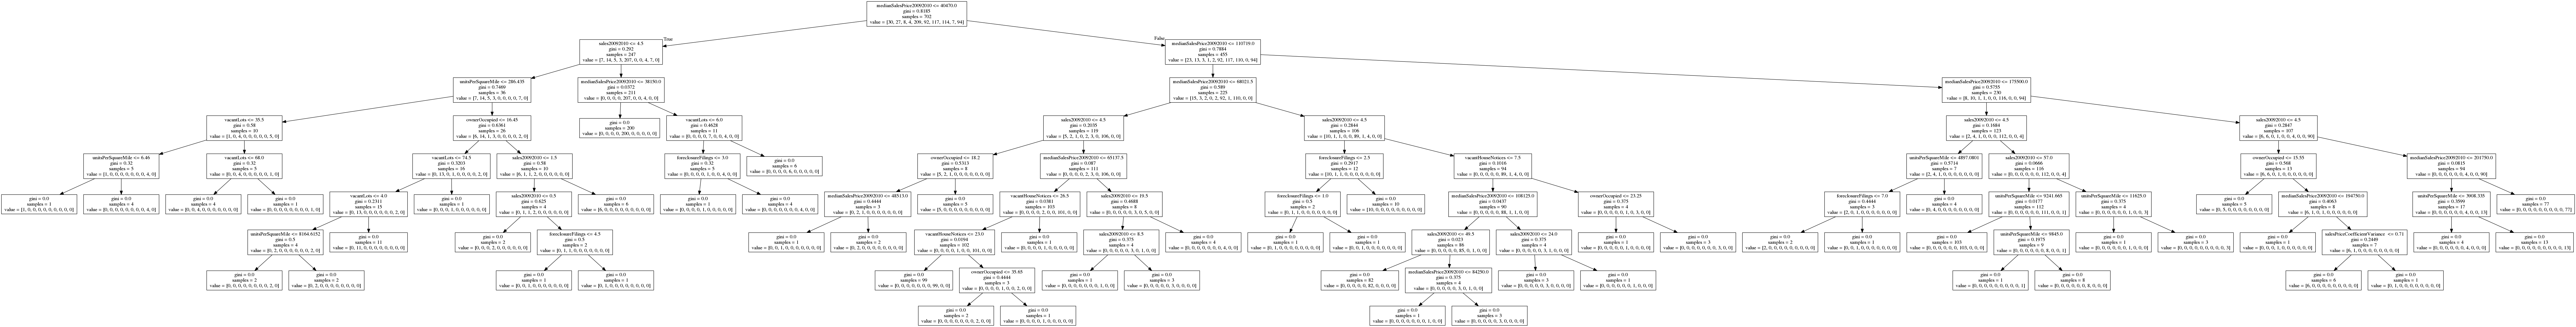

In [337]:
with open("dt.dot", 'w') as f:
    export_graphviz(dt, out_file=f, feature_names=X.columns)
os.system('dot -Tpng dt.dot -o dt.png')
Image(filename='dt.png')

##### Confusion matrix shows the decision tree fits the dataset to 100% accuracy.

In [338]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, dt.predict(X))

array([[ 30,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   8,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   4,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 209,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  92,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 117,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 114,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  94]])

##### Correlation analysis on the dataset features reveals 'salesPriceCoefficientVariance' is highly correlated with 2 other features among other correlated features.

In [339]:
correlationMatrix = X.corr()

In [340]:
((correlationMatrix > 0.4) & (correlationMatrix <1.0))  | ((correlationMatrix > -1.0) & (correlationMatrix < -0.4))

,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
sales20092010,False,False,False,False,False,False,False,False,False,False
salesPriceCoefficientVariance,False,False,False,False,False,False,True,False,True,False
commercialResidentialLandRatio,False,False,False,False,False,False,False,False,False,False
unitsPerSquareMile,False,False,False,False,True,False,False,False,False,False
residentialPermits,False,False,False,True,False,False,False,False,False,False
vacantLots,False,False,False,False,False,False,False,False,False,False
vacantHouseNotices,False,True,False,False,False,False,False,False,True,False
foreclosureFilings,False,False,False,False,False,False,False,False,False,False
medianSalesPrice20092010,False,True,False,False,False,False,True,False,False,False
ownerOccupied,False,False,False,False,False,False,False,False,False,False


In [341]:
dt.feature_importances_

array([ 0.18096288,  0.00298336,  0.        ,  0.03553139,  0.        ,
        0.01882287,  0.01167538,  0.01293619,  0.71011671,  0.02697122])

### <span style="color:green">Upon inspection of the decision tree and, more importantly, the feature importances we notice that 87% of the decisioning is based on the features 'sales20092010' (17%) and 'medianSalesPrice20092010' (71%). This is agreement with the ground truth i.e. the description of the dataset which states that market category labels depend predominantly on number of sales and sales price. We also observe correlation between other minor features and these two features in the correlation matrix. This is possibly the reason why some of these features have significantly small weights in teh feature importance vector. </span>

##  Attempting to improve decision tree prediction performance

##### Histogram for class labels to understand distibution of instances

In [342]:
dataframe_improved = deepcopy(dataframe)
dataframe_improved.marketCategory.value_counts()

Distressed                                        209
Middle Market Choice                              117
Middle Market Stressed                            114
Regional Choice                                    94
Middle Market                                      92
< 5 Residential Sales (2009-2010)                  30
< 5 Sales; MultiFamily (>65% of Housing Units)     27
>50 residential lots; >40 % vacant lots             8
NR - Non-residential (<50 residential lots)         7
>50 residential lots; >50 % vacant lots             4
dtype: int64

### <span style="color:green; font-weight:bold">Merging the tail end of market categories into a new, single category </span>
<span style="color:green; font-weight:bold">The long tail looks like categories for areas where there aren't many sales (hypothesis: either because people dont like those blocks or there aren't many residential properties or residential properties aren't up for sale on the market). Merging all these low count categories into a single category 'Other' should eliminate the long tail. This should help reduce perplexity due to the long tail and potentially improve accuracy adn reduce complexity of the model and any over-fitting due to minor class labels.</span>

In [343]:
dataframe_improved.marketCategory.cat.add_categories('Other', inplace=True)

In [344]:
dataframe_improved.marketCategory.cat.categories

Index([u'< 5 Residential Sales (2009-2010)',
       u'< 5 Sales; MultiFamily (>65% of Housing Units)',
       u'>50 residential lots; >40 % vacant lots',
       u'>50 residential lots; >50 % vacant lots', u'Distressed',
       u'Middle Market', u'Middle Market Choice', u'Middle Market Stressed',
       u'NR - Non-residential (<50 residential lots)', u'Regional Choice',
       u'Other'],
      dtype='object')

In [345]:
dataframe_improved.marketCategory.replace({'< 5 Residential Sales (2009-2010)': 'Other', 
                              '< 5 Sales; MultiFamily (>65% of Housing Units)':'Other',
                             'NR - Non-residential (<50 residential lots)':'Other',
                             '>50 residential lots; >40 % vacant lots':'Other',
                             '>50 residential lots; >50 % vacant lots':'Other'}, inplace=True)

In [346]:
dataframe_improved.marketCategory.cat.remove_unused_categories(inplace=True)

In [347]:
dataframe_improved.marketCategory.value_counts()

Distressed                209
Middle Market Choice      117
Middle Market Stressed    114
Regional Choice            94
Middle Market              92
Other                      76
dtype: int64

##### Retraining decision tree with new 'marketCategory' labels

In [348]:
X_improved=dataframe_improved.copy()
X_improved.drop(['marketCategory'], axis=1, inplace=True)

In [349]:
le_improved = preprocessing.LabelEncoder()
Y_improved = le_improved.fit_transform(dataframe_improved['marketCategory'])
encodedValues = sorted(pd.unique(Y_improved).tolist())
print(encodedValues)
le_improved.inverse_transform(encodedValues)

[0, 1, 2, 3, 4, 5]


array(['Distressed', 'Middle Market', 'Middle Market Choice',
       'Middle Market Stressed', 'Other', 'Regional Choice'], dtype=object)

In [350]:
dt_improved = DecisionTreeClassifier()
dt_improved.fit(X_improved.values, Y_improved)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

##### Measuring accuracy using cross-validation with 4 folds. <span style="color:green">The average accuracy has improved and is above 90%.</span>

In [351]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(dt_improved, X_improved, Y_improved, cv = 4)
scores

array([ 0.93820225,  0.9375    ,  0.97126437,  0.97126437])

In [352]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.03)


##### Given the new observation proportions after collapsing the long tail market categories, we can run cross-validation with 10 folds. The improved accuracy still holds across all folds.

In [353]:
scores = cross_validation.cross_val_score(dt_improved, X_improved, Y_improved, cv = 10)
scores

array([ 0.95890411,  0.87671233,  0.90277778,  0.97222222,  0.94285714,
        0.95714286,  0.94202899,  1.        ,  0.98529412,  0.94029851])

In [354]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.07)


##### Exporting the decision tree to DOT and PNG files and visualizing the tree here. The decision tree after collapsing the long tail market categories is significantly less complex (i.e. has lesser decision nodes) than before resulting in a tree with lesser width.

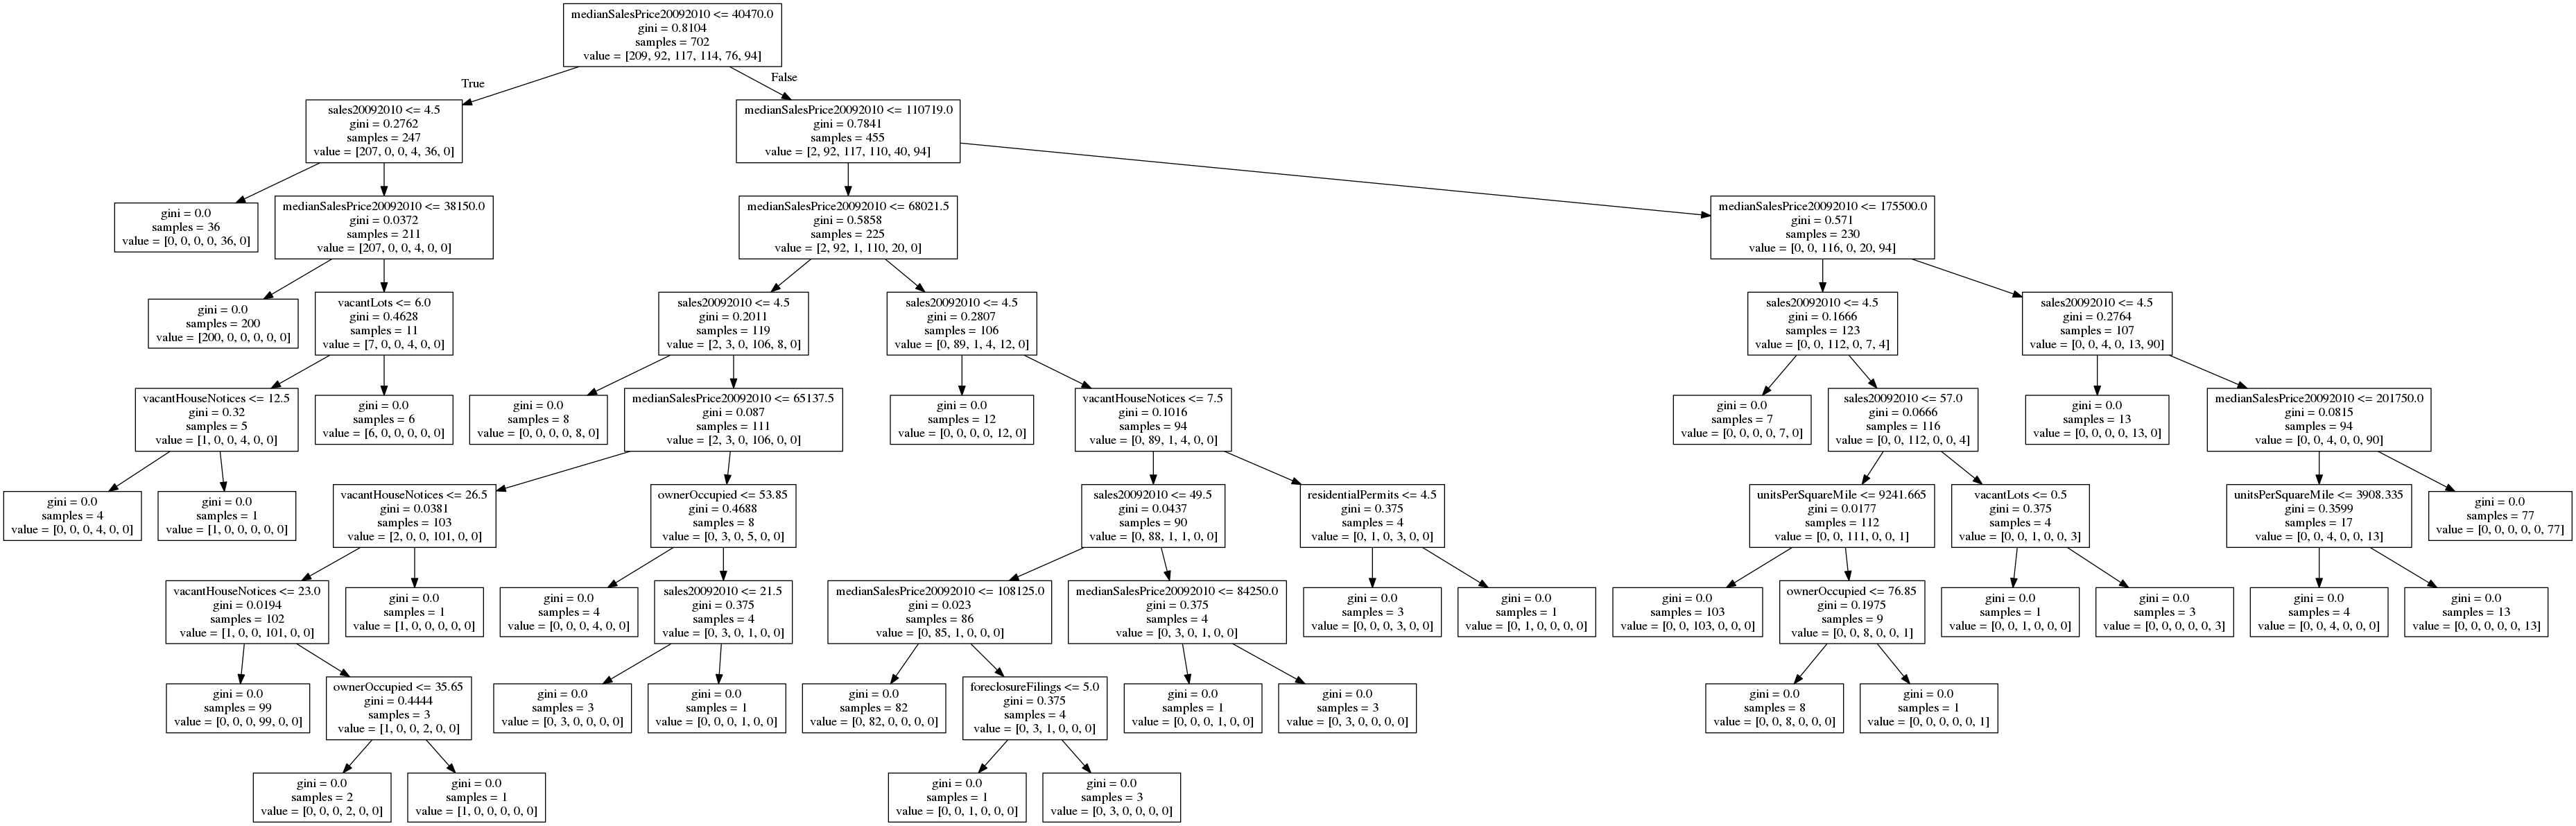

In [355]:
with open("dt_improved.dot", 'w') as f:
    export_graphviz(dt_improved, out_file=f, feature_names=X_improved.columns)
os.system('dot -Tpng dt_improved.dot -o dt_improved.png')
Image(filename='dt_improved.png')

##### The model still fits the entire dataset with 100% accuracy

In [356]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_improved, dt_improved.predict(X_improved))

array([[209,   0,   0,   0,   0,   0],
       [  0,  92,   0,   0,   0,   0],
       [  0,   0, 117,   0,   0,   0],
       [  0,   0,   0, 114,   0,   0],
       [  0,   0,   0,   0,  76,   0],
       [  0,   0,   0,   0,   0,  94]])

#####  <span style="color:green">Additionally, two correlated features 'salesPriceCoefficientVariance' and 'residentialPermits' are asigned zero weight when training the decision tree. This is also proof of improvement.</span>

In [357]:
dt_improved.feature_importances_

array([ 0.23855435,  0.        ,  0.        ,  0.01111286,  0.00263671,
        0.00877304,  0.01460534,  0.00263671,  0.71225723,  0.00942378])